In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg as LA

import Hamiltonian as Hamiltonian
import Plotting as plotting
import constants as cst

### Exploring the Hamiltonian: Generating 3 sets of band structures

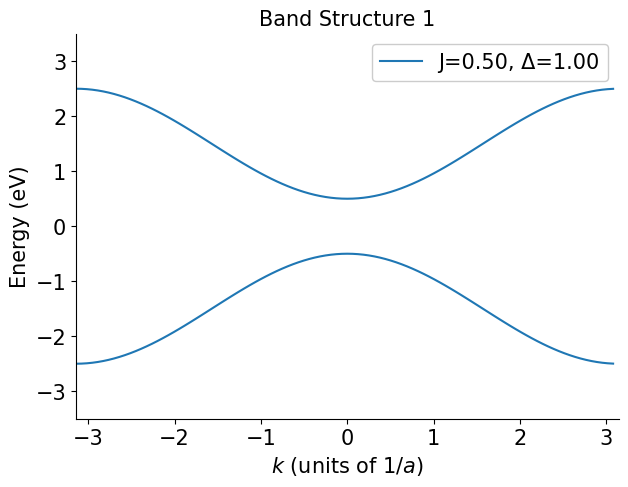

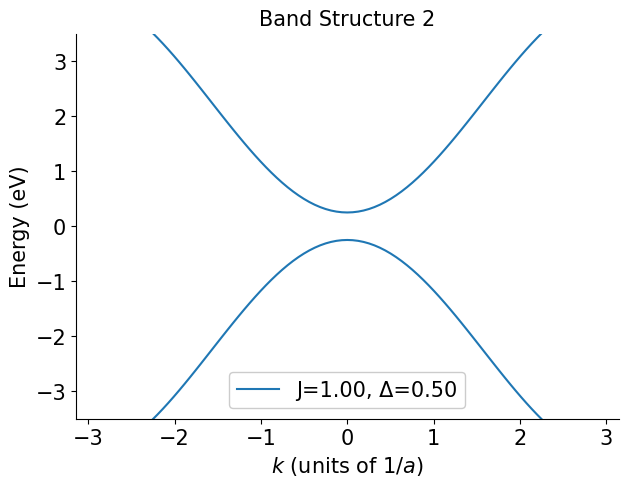

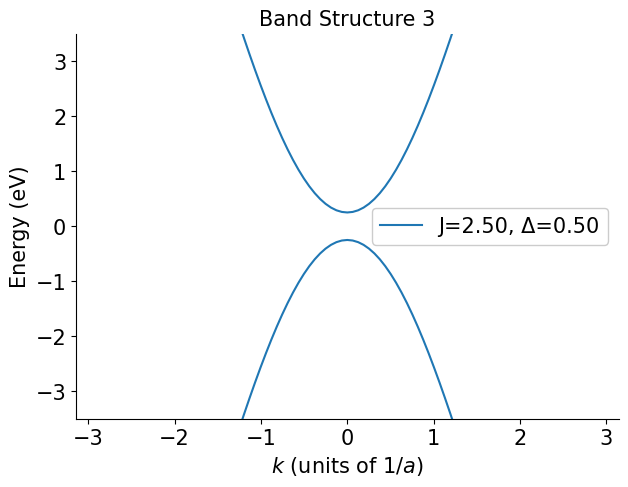

0

In [3]:
k_vals = np.linspace(-np.pi, np.pi, 101)[:-1]

#---------- First plot : -------------------

J_list     = np.array([0.5])/cst.Ry
delta_list = np.array([1])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure(
    Title="Band Structure 1", k_vals=k_vals, J_list=J_list, delta_list=delta_list, vb=valence_bands, cb=conduction_bands, limits=limits, fout='')


#---------- Second plot : -------------------

J_list     = np.array([1.0])/cst.Ry
delta_list = np.array([0.5])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure("Band Structure 2", k_vals, J_list, delta_list, valence_bands, conduction_bands, limits,fout='')



#---------- Third plot : -------------------

J_list     = np.array([2.5])/cst.Ry
delta_list = np.array([0.5])/cst.Ry


valence_bands    = {}
conduction_bands = {}
for J in J_list:
    for Δ in delta_list:
        valence_bands[J,Δ]    = Hamiltonian.eps_vb( k_vals, J, Δ )
        conduction_bands[J,Δ] = Hamiltonian.eps_cb( k_vals, J, Δ )

limits=np.array([[-np.pi,np.pi],[-3.5,3.5]])

plotting.plot_band_structure("Band Structure 3", k_vals, J_list, delta_list, valence_bands, conduction_bands, limits,fout='')



### Exploring the E Field: Generating 3 different fields

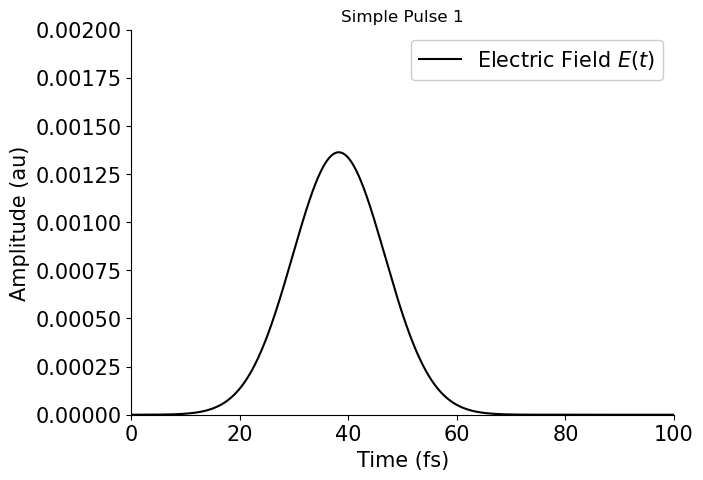

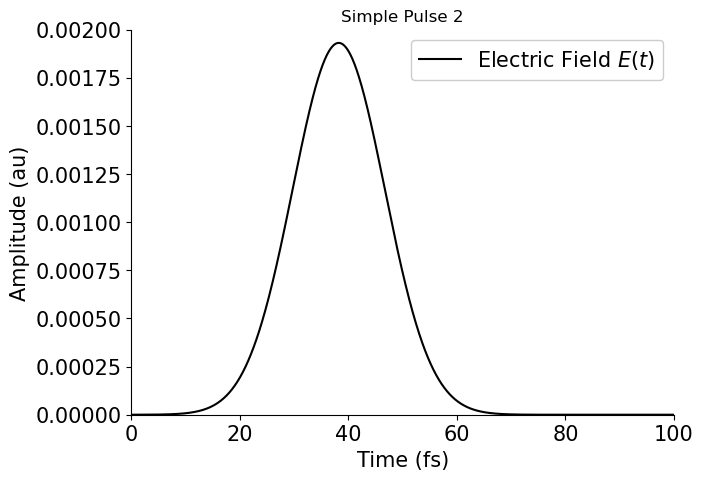

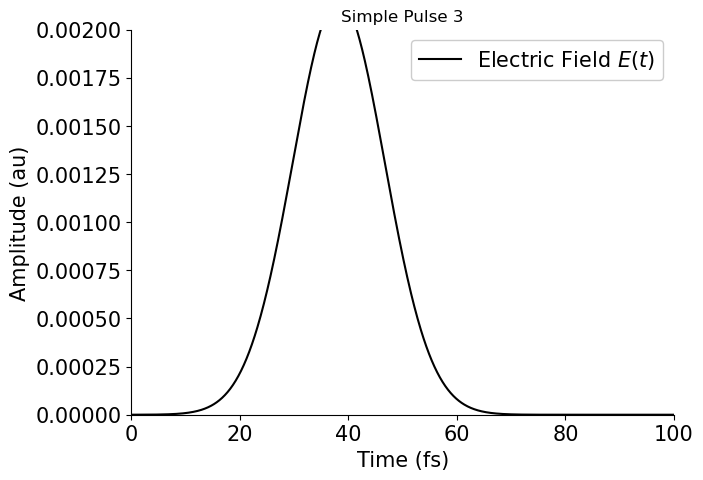

0

In [4]:
case=1

t = np.linspace(0, 100, 1000)/ cst.tfs

#-------------- Simple Pulse 1 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.2

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 1",t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')




#-------------- Simple Pulse 2 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.7

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 2", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#-------------- Simple Pulse 3 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Simple Pulse 3", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



### Exploring the 9 possible combinations of the above 

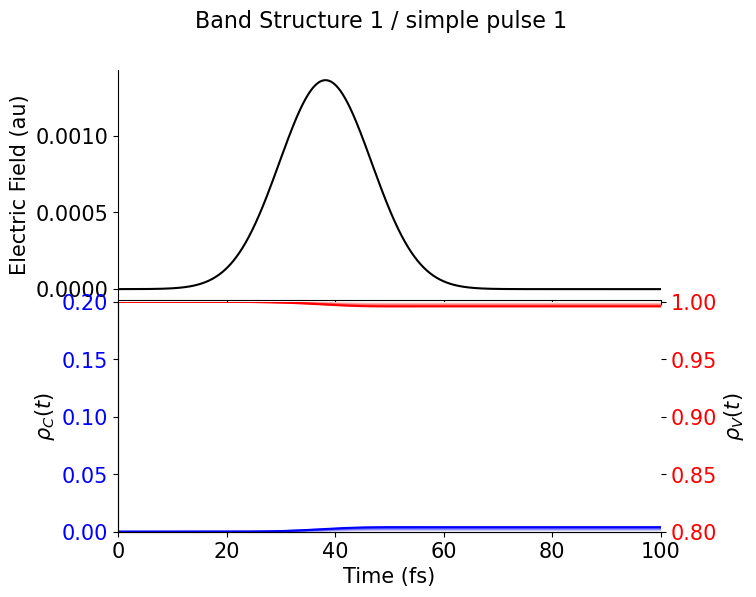

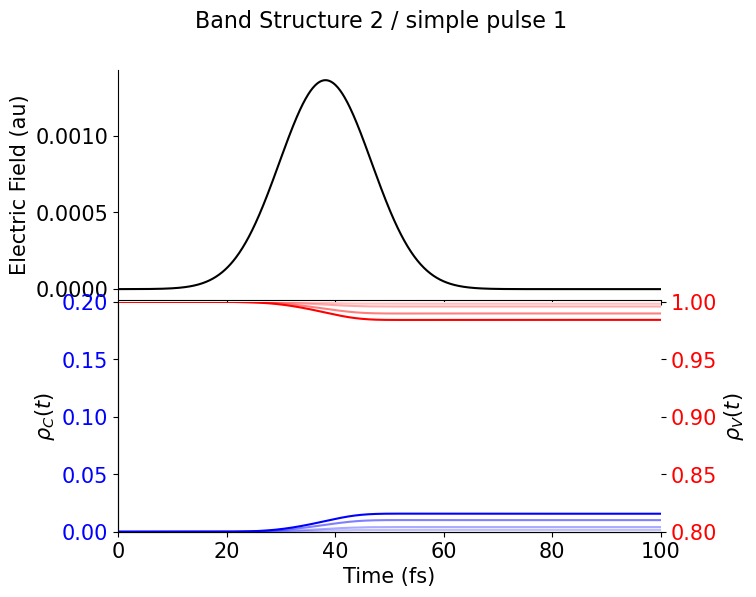

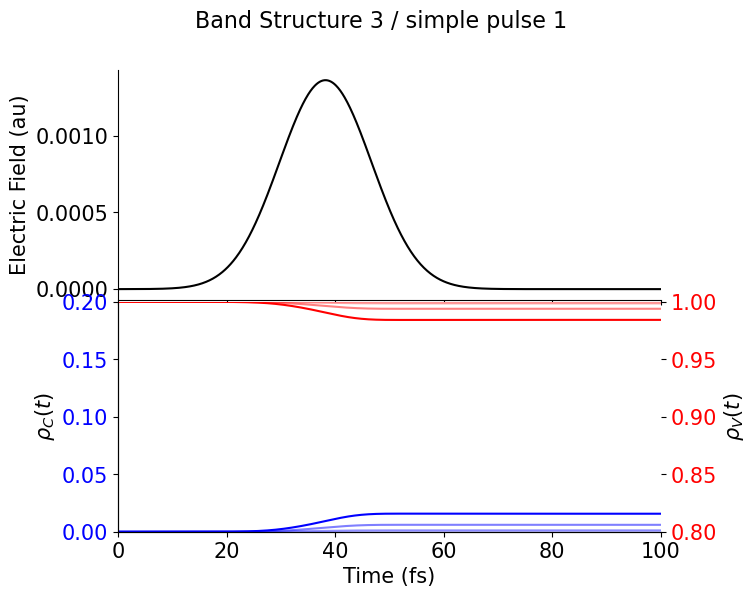

0

In [5]:
#-------------- Simple Pulse 1 --------------
#case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.2

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 1",t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')




#------------ Band Structure 1 / simple pulse 1 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 1 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 1 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 1", t*cst.tfs,efield_case1,k_list,solutions.real,limits)

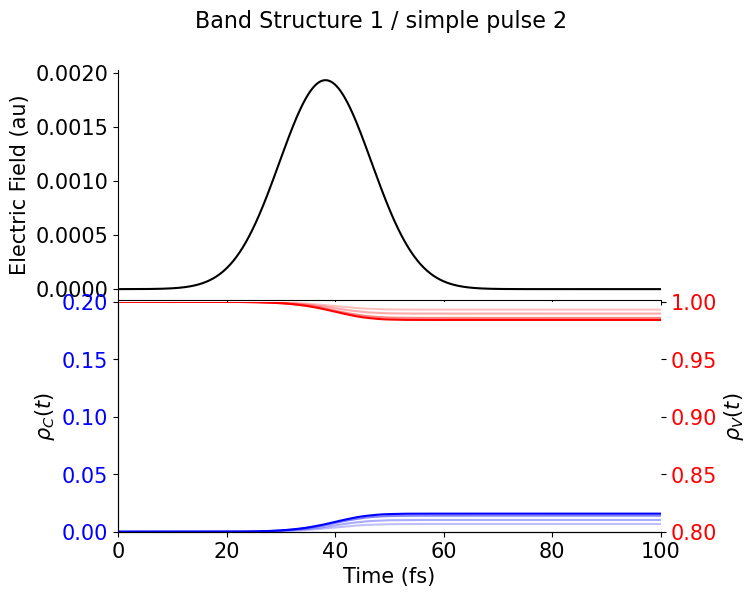

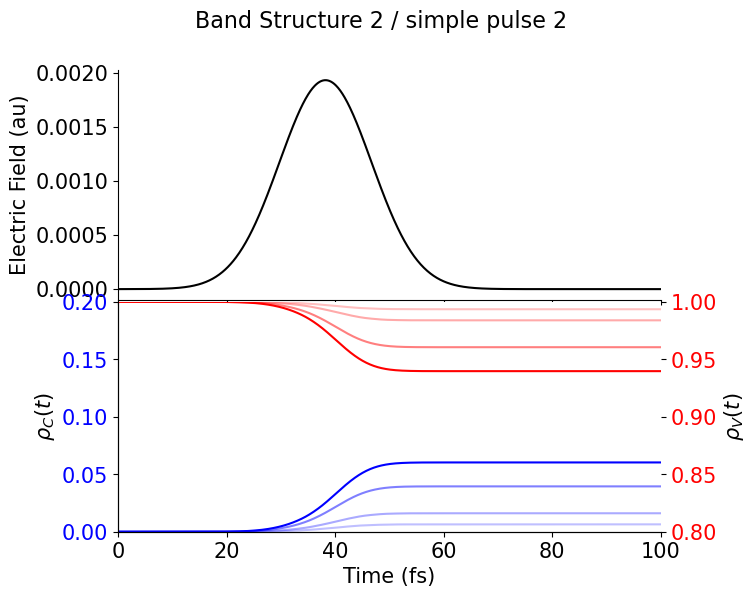

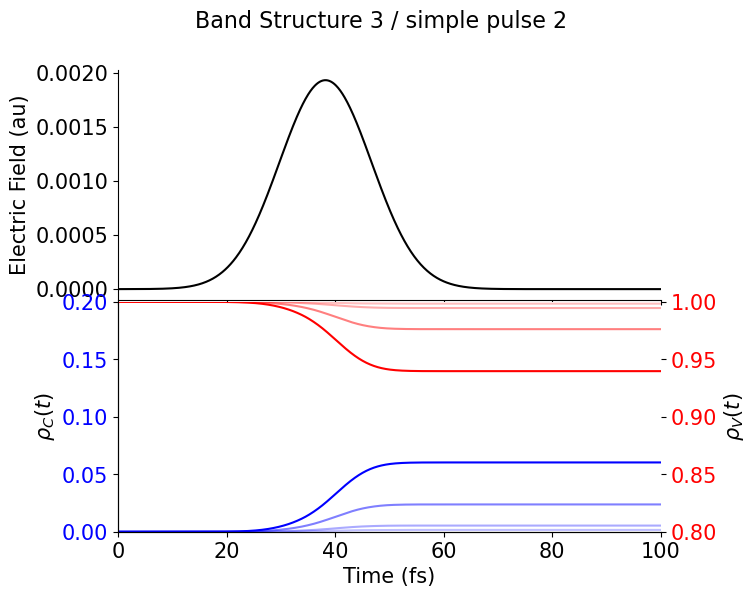

0

In [6]:
#-------------- Simple Pulse 2 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.7

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 2", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#------------ Band Structure 1 / simple pulse 2 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 2 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 2 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 2", t*cst.tfs,efield_case1,k_list,solutions.real,limits)

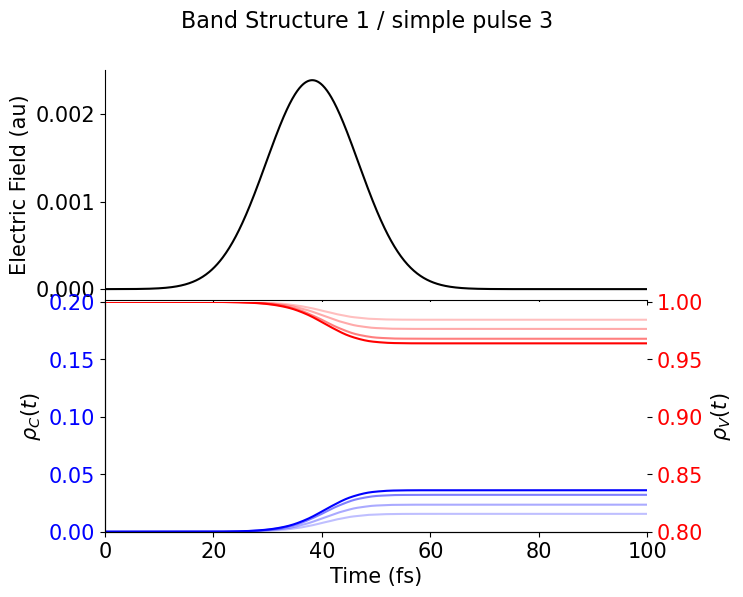

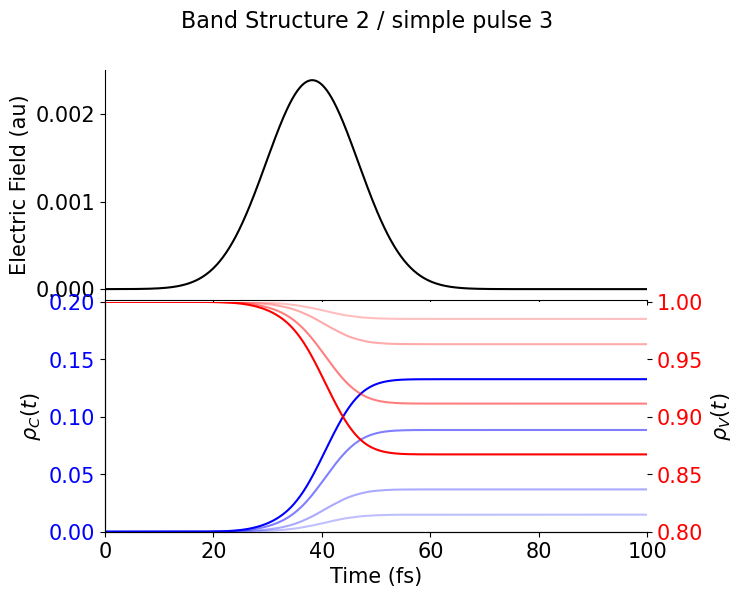

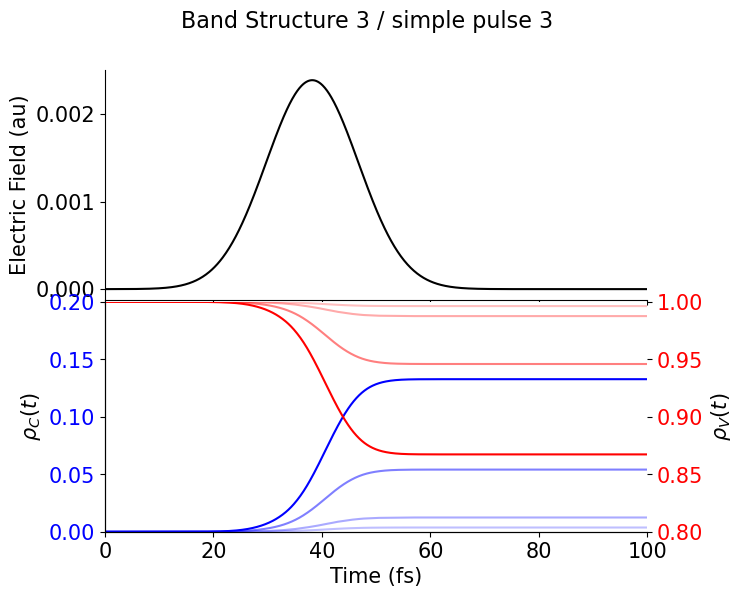

0

In [7]:

#-------------- Simple Pulse 3 --------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 2.1

efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Simple Pulse 3", t*cst.tfs, efield_case1, np.array([[0,100],[-0.002*0,0.002]]),fout='')



#------------ Band Structure 1 / simple pulse 3 --------------

J     = 0.5/cst.Ry
delta = 1/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 1 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)





#------------ Band Structure 2 / simple pulse 3 --------------

J     = 1/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 2 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)



#------------ Band Structure 3 / simple pulse 3 --------------

J     = 2.5/cst.Ry
delta = 0.5/cst.Ry
k_list=[0, 0.25, 0.50, 0.75]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Band Structure 3 / simple pulse 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)


### Exploring the envelope E field: 3 cases

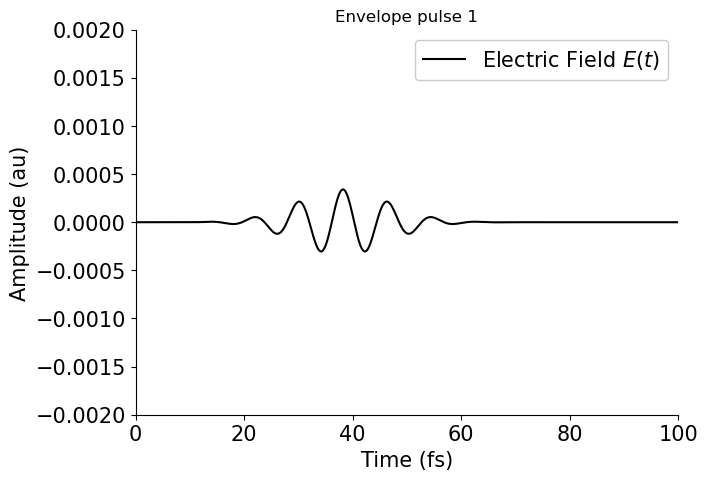

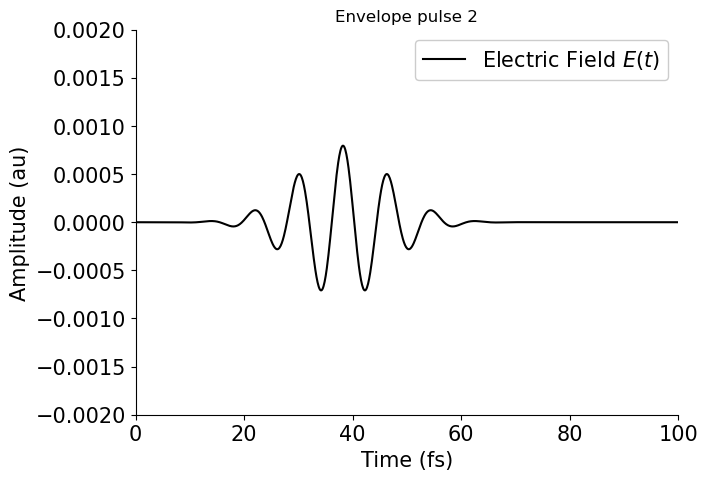

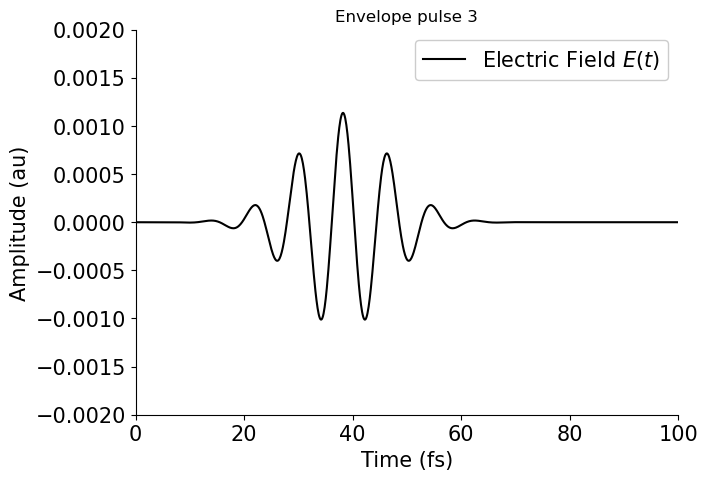

0

In [8]:
case=2

t = np.linspace(0, 100, 1000)/ cst.tfs


#---------------- Envelope pulse 1 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.3

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 1", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')


#---------------- Envelope pulse 2 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.7

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 2", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')


#---------------- Envelope pulse 3 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.0

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
plotting.plot_electric_pulse("Envelope pulse 3", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')







### Exploring the 9 possible combinations of the above 

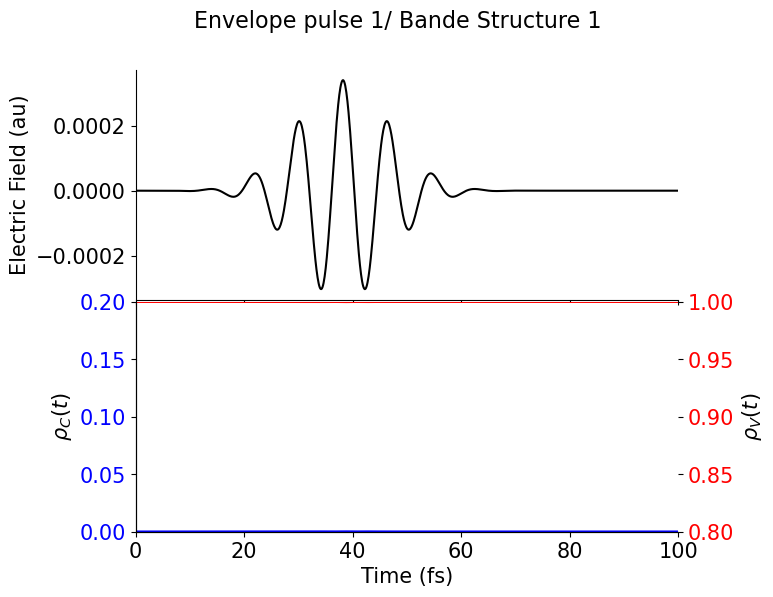

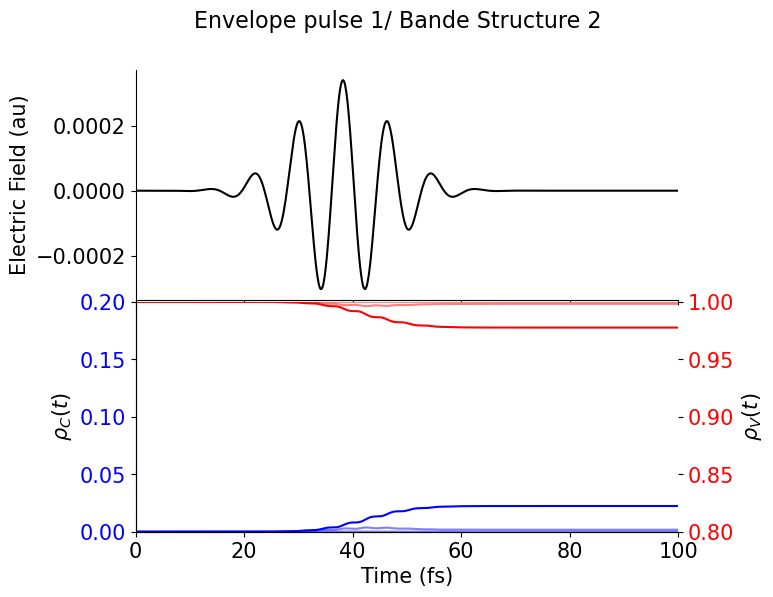

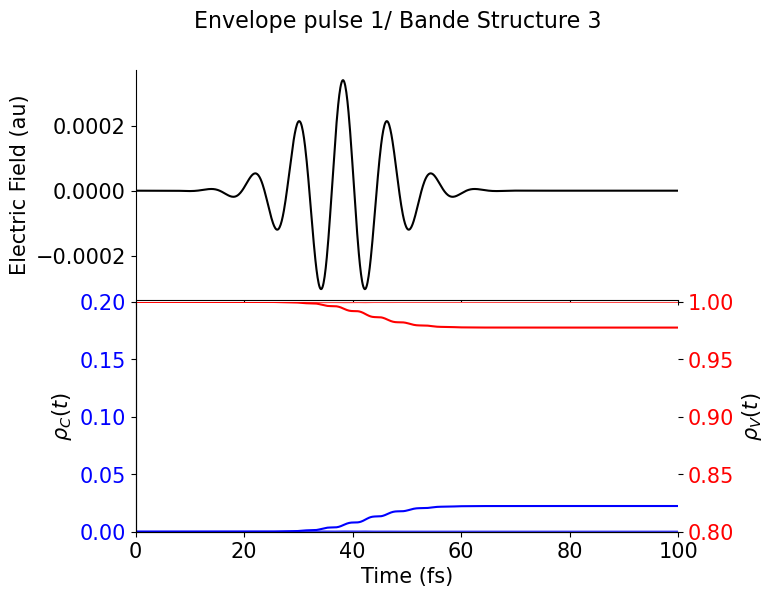

0

In [9]:

#---------------- Envelope pulse 1 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.3

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 1", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')

k_list=[0, 0.25, 0.50, 0.75]
t_span= (t[0],t[-1])

#---------------- Envelope pulse 1/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 1/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)



#---------------- Envelope pulse 1/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 1/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


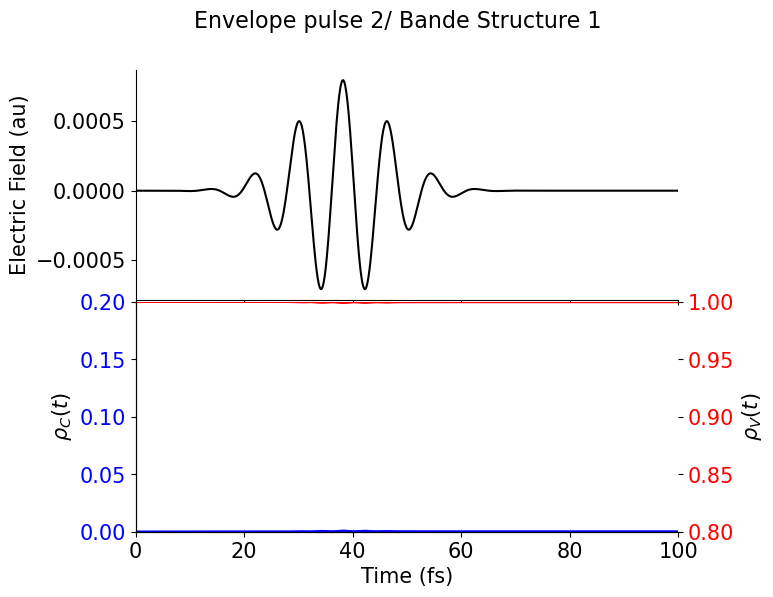

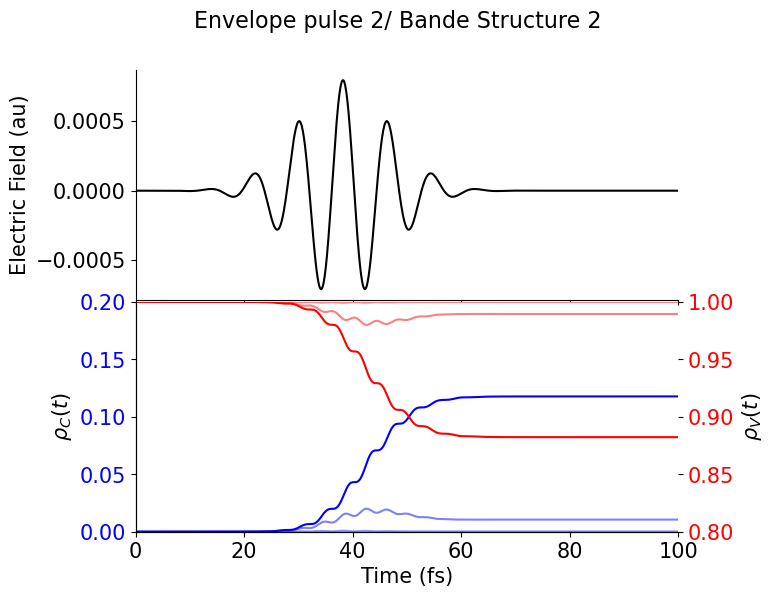

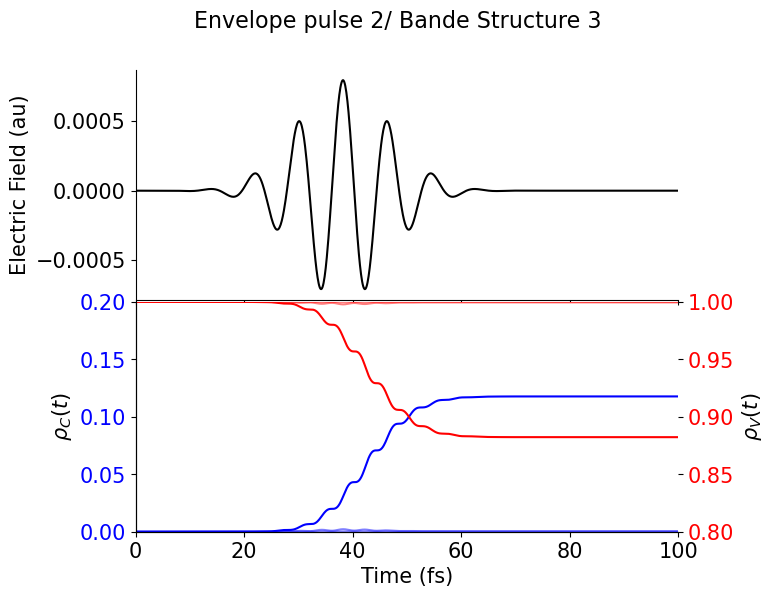

0

In [10]:

#---------------- Envelope pulse 2 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 0.7

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 2", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')



#---------------- Envelope pulse 1/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 2/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)



#---------------- Envelope pulse 2/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 2/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)




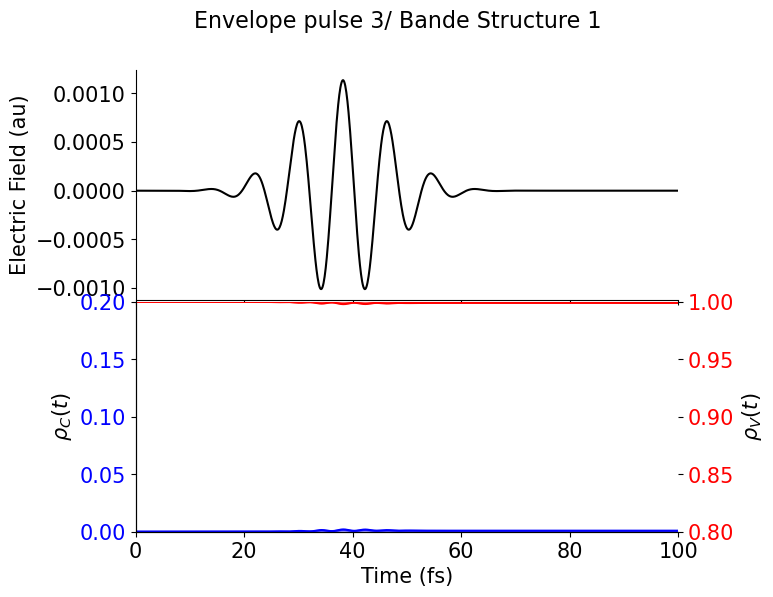

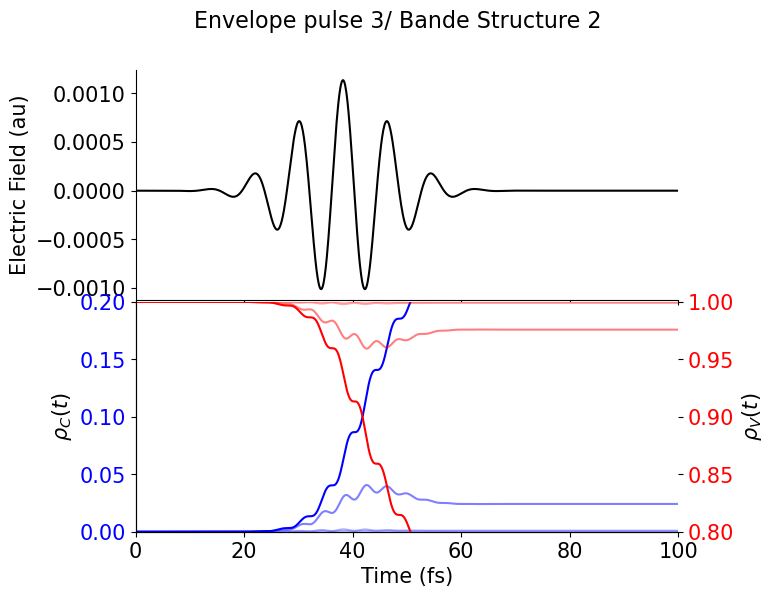

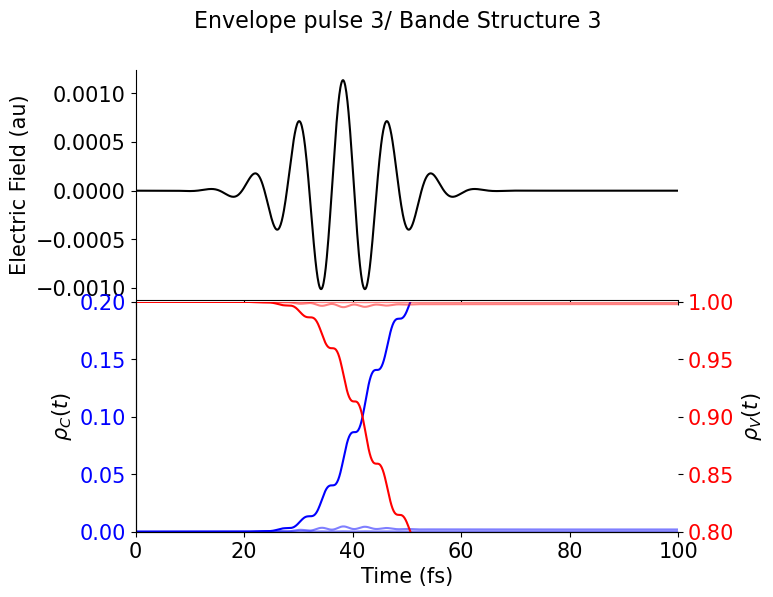

0

In [11]:

#---------------- Envelope pulse 3 ---------------

FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.0

efield_case2 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
#plotting.plot_electric_pulse("Envelope pulse 3", t*cst.tfs, efield_case2, np.array([[0,100],[-0.002,0.002]]),fout='')

#---------------- Envelope pulse 3/ Bande Structure 1---------------
J     = 0.5/cst.Ry
delta = 1.0/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 1", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 3/ Bande Structure 2---------------
J     = 1.0/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 2", t*cst.tfs,efield_case2,k_list,solutions.real,limits)


#---------------- Envelope pulse 3/ Bande Structure 3---------------
J     = 2.5/cst.Ry
delta = 0.5/cst.Ry

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]

limits=np.array([[0,100],[0.0,0.2]])
plotting.plot_population_field("Envelope pulse 3/ Bande Structure 3", t*cst.tfs,efield_case2,k_list,solutions.real,limits)






### After fixing a case, test the DMD algorithm

In [12]:
#====================== DMD ===================


# DMD Reconstruction Function
def DMDRebuild(X, Y, t, orden_truncado, truncate=True, correction=True):
    U2, Sig2, Vh2 = LA.svd(X, full_matrices=False)  # SVD of input matrix

    if truncate:
        r = np.where(np.log10(Sig2 / Sig2[0]) <= orden_truncado)[0][0]
    else:
        r = len(Sig2)

    U = U2[:, :r]
    Sig = np.diag(Sig2[:r])
    V = Vh2.conj().T[:, :r]

    Atil = U.conj().T @ Y @ V @ LA.inv(Sig)
    mu, W = LA.eig(Atil)
    Phi = Y @ V @ LA.inv(Sig) @ W

    dt = t[1] - t[0]
    omega = np.log(mu) / dt
    b = np.linalg.pinv(Phi) @ X[:, 0]

    time_dynamics = np.array([b * np.exp(omega * T) for T in t]).T  # shape (r, len(t)-1)
    X_dmd = Phi @ time_dynamics  # shape (n, len(t)-1)

    return mu, X_dmd

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA


#-------------- Simple Pulse 3 / Band structure 1--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 0.5/cst.Ry
delta  = 1.0/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])
#plotting.plot_population_field("Envelope pulse 3/ Bande Structure 3", t*cst.tfs,efield_case1,k_list,solutions.real,limits)


# ====== Using it ======
truncamiento = -7
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead
eigvals, X_DMD = DMDRebuild(X, Y, t_dmd, truncamiento, True, True)



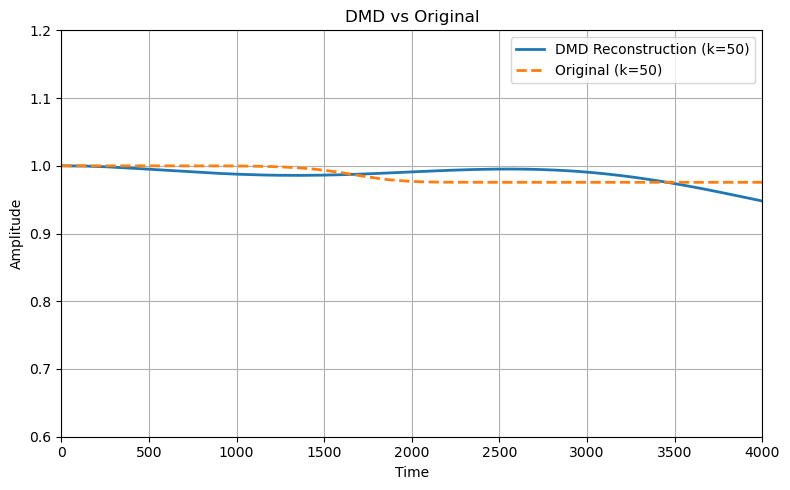

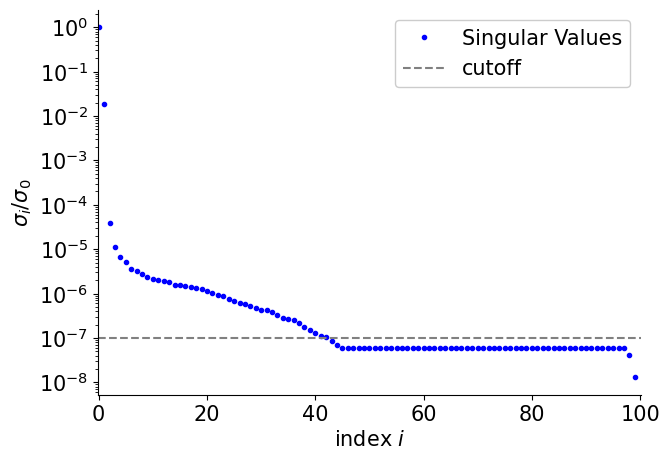

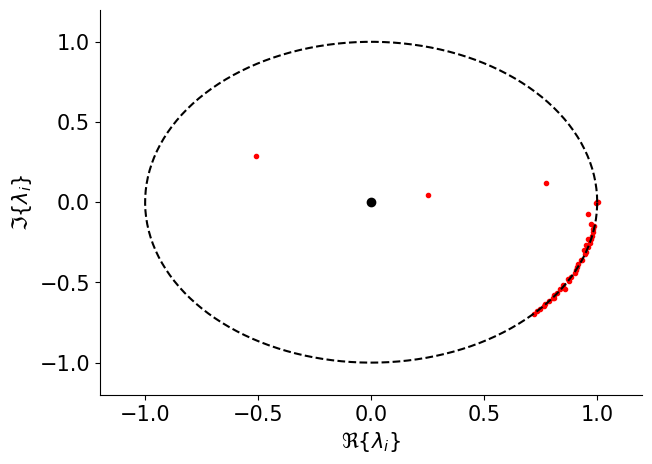

0

In [24]:
plotting.plot_dmd_reconstruction_vs_original(t_dmd,X_DMD.real, X ,k_i=50,xlim=(0, 4000),ylim=(0.6, 1.2))



eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, 3)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y,orden_truncado=truncamiento)
plotting.plot_singular_values(Sig2,10**(truncamiento))
plotting.plot_eigenvalues(mu)

In [25]:


#-------------- Simple Pulse 3 / Band structure 3--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 2.5/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



# ====== Using it ======
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead
eigvals, X_DMD = DMDRebuild(X, Y, t_dmd, truncamiento, True, True)




### Studying the eigenvalues

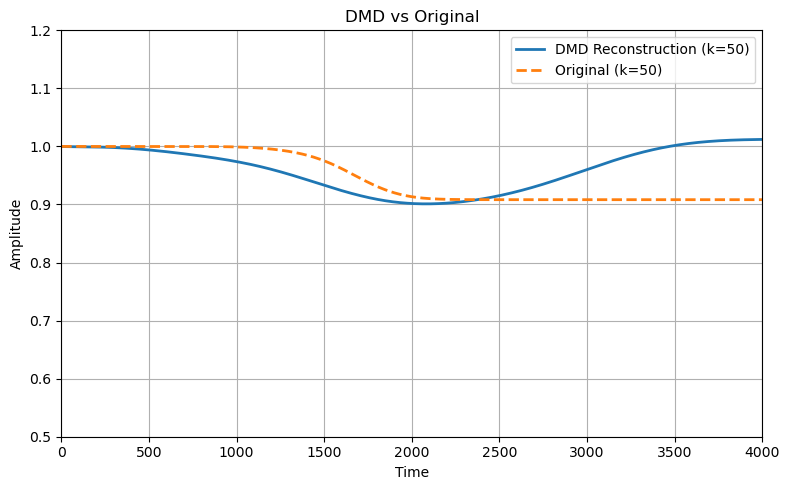

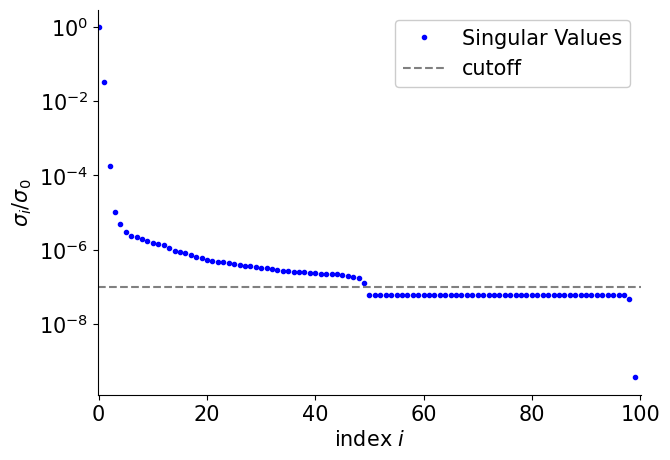

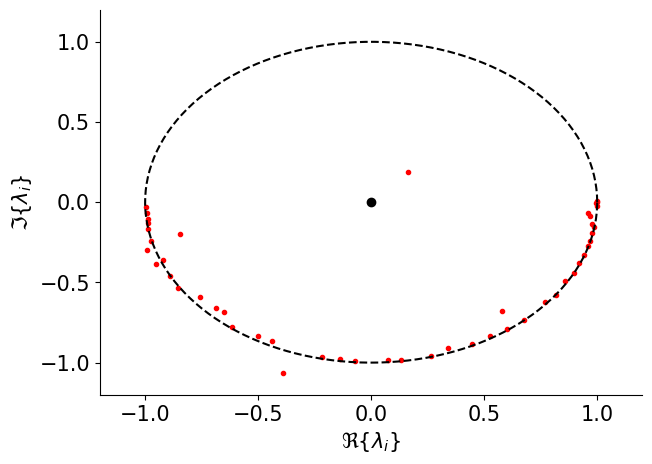

0

In [26]:
plotting.plot_dmd_reconstruction_vs_original(t_dmd,X_DMD.real, X ,k_i=50,xlim=(0, 4000),ylim=(0.5, 1.2))


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, 3)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y,orden_truncado=truncamiento)
plotting.plot_singular_values(Sig2,10**(truncamiento))
plotting.plot_eigenvalues(mu)

In [27]:


#-------------- Simple Pulse 3 / Band structure 2--------------
case = 1
FWHM  = 20. / cst.tfs
sigma = FWHM/(2.0*np.sqrt(2*np.log(2)))
E0 = 1.9
efield_case1 = Hamiltonian.E(t, sigma,E0, ω=0.5/cst.Ry, case=case )
t = np.linspace(0, 100, 1000)/ cst.tfs
J      = 1.0/cst.Ry
delta  = 0.5/cst.Ry
k_list = np.linspace(-np.pi, np.pi, 101)[:-1]

t_span= (t[0],t[-1])

solutions=np.zeros((len(k_list),2,len(t)),dtype=np.complex64)
for k_i,k in enumerate(k_list):
    y0 = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    sol = solve_ivp(lambda t, y: Hamiltonian.rhs(t, y, k, J, delta, sigma, E0, ω=0.5/cst.Ry,case=case), t_span, y0, t_eval=t)
    solutions[k_i,0,:] = sol.y[0]
    solutions[k_i,1,:] = sol.y[1]
limits=np.array([[0,100],[0.0,0.2]])



# ====== Using it ======
t_dmd = t[:-1]  # because X and Y have 999 time steps
X = solutions[:, 0, :-1]  # shape: (num_k, len(t)-1)
Y = solutions[:, 0, 1:]   # one step ahead
eigvals, X_DMD = DMDRebuild(X, Y, t_dmd, truncamiento, True, True)




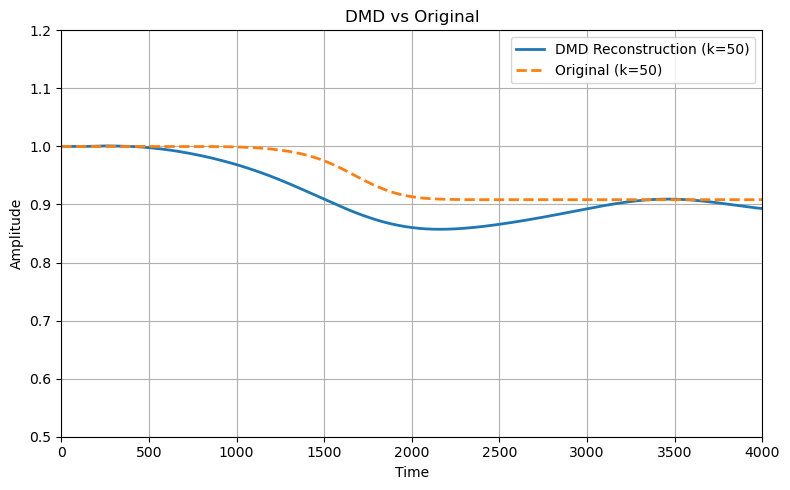

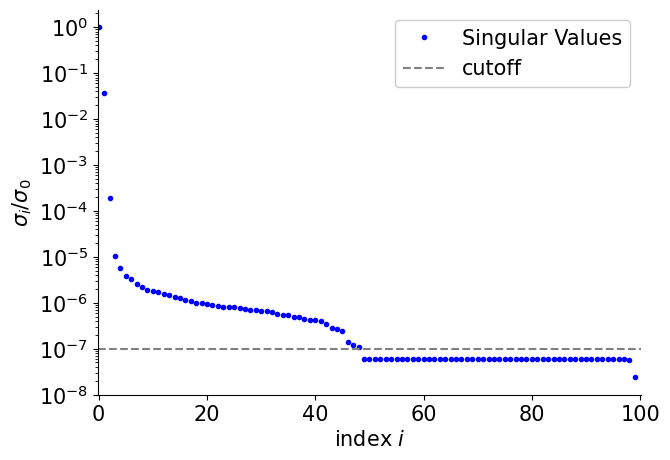

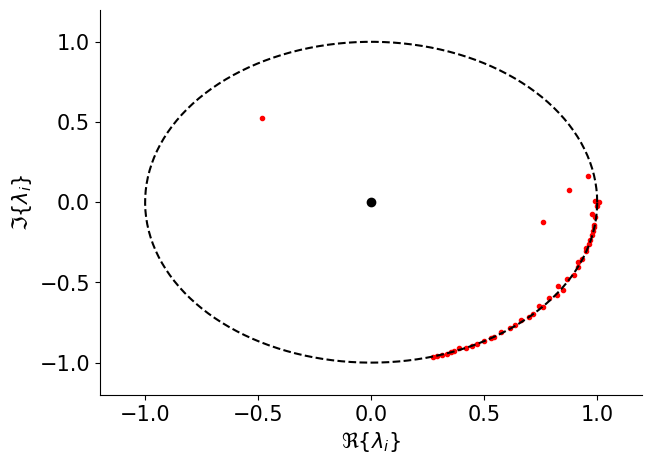

0

In [28]:
plotting.plot_dmd_reconstruction_vs_original(t_dmd,X_DMD.real, X ,k_i=50,xlim=(0, 4000),ylim=(0.5, 1.2))


eigvals, Phi_L, r_L, S      = Hamiltonian.perform_dmd(X, Y, t, 3)
mu, Phi_M, r_M, Sig2 = Hamiltonian.DMD(X, Y,orden_truncado=truncamiento)
plotting.plot_singular_values(Sig2,10**(truncamiento))
plotting.plot_eigenvalues(mu)